The following shows how to use the `DataLoader` class to plot light curves and spectra given a source id

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from astropy.timeseries import LombScargle
from matplotlib import pyplot as plt
sys.path.append('../src')

from data import DataLoader

loader = DataLoader(dataset_dir=Path('../data/DR3_40obs_20mag_with_spectra/'))

example_sid = 4039170760523672192

Plotting a light curve

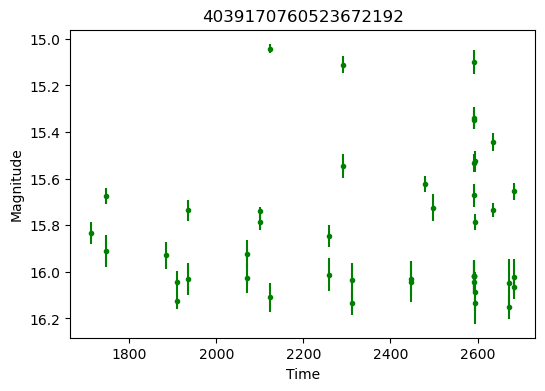

In [2]:
lc = loader.get_lightcurve(example_sid)
time, mag, err = lc['g']

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(time, mag ,err, c='g', fmt='.')
ax.invert_yaxis()
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
ax.set_title(example_sid);

Plotting the folded light curve

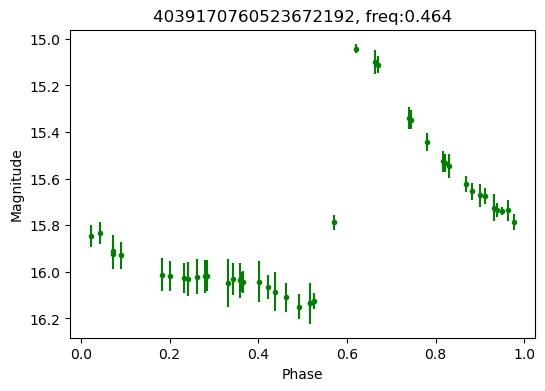

In [3]:
freq = np.arange(1e-3, 25, 1e-4)
ampl = LombScargle(time, mag, err).power(freq, method='fast', assume_regular_frequency=True)
best_freq = freq[np.argmax(ampl)]

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(np.mod(time,1/best_freq)*best_freq, mag ,err, c='g', fmt='.')
ax.invert_yaxis()
ax.set_xlabel('Phase')
ax.set_ylabel('Magnitude')
ax.set_title(f'{example_sid}, freq:{1/best_freq:0.3f}');

Plotting the xp coefficients

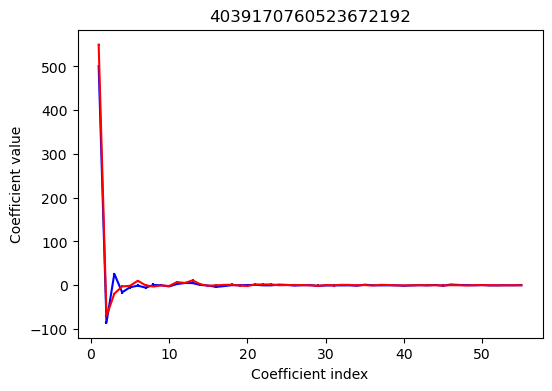

In [4]:
xp = loader.get_continuous_spectra(example_sid)
bp_coef, bp_err = xp['bp']
rp_coef, rp_err = xp['rp']
coef_index = np.arange(1, len(bp_coef)+1, 1)

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(coef_index, bp_coef, bp_err, c='b')
ax.errorbar(coef_index, rp_coef, rp_err, c='r')
ax.set_xlabel('Coefficient index')
ax.set_ylabel('Coefficient value')
ax.set_title(example_sid);

Plotting sampled xp spectra

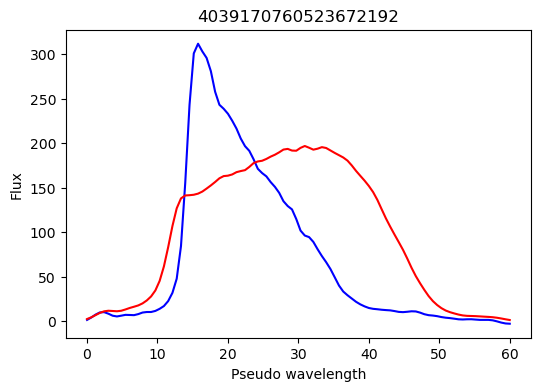

In [5]:
pseudo_wavelenghts = np.linspace(0, 60, 100)
xp = loader.get_sampled_spectra(example_sid, pseudo_wavelenghts=pseudo_wavelenghts)
bp_val, rp_val = xp['bp'], xp['rp']

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pseudo_wavelenghts, bp_val, c='b')
ax.plot(pseudo_wavelenghts, rp_val, c='r')
ax.set_xlabel('Pseudo wavelength')
ax.set_ylabel('Flux')
ax.set_title(example_sid);